In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import dotenv
from dotenv import load_dotenv
from sklearn.preprocessing import StandardScaler




In [12]:
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")

In [13]:
heart_data=pd.read_csv(dataset_path)

In [14]:
'''Age: Age of the person 👤
Sex: Gender of the person 👨/👩
CP: Chest pain type 💥
TRTBPS: Resting blood pressure (in mm Hg) 💉
Chol: Cholesterol level (mg/dl) 🩸
FBS: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 🍬
Restecg: Resting electrocardiographic results 📈
Thalachh: Maximum heart rate achieved 💓
Exng: Exercise-induced angina (1 = yes; 0 = no) 🚴‍♂️
Oldpeak: Previous peak ⛰️
SLP: Slope of the peak exercise segment 📐
CAA: Number of major vessels (0-3) 🩺
Thall: Thalassemia rate 🧬
Output: Target variable indicating heart attack risk ⚠️'''

'Age: Age of the person 👤\nSex: Gender of the person 👨/👩\nCP: Chest pain type 💥\nTRTBPS: Resting blood pressure (in mm Hg) 💉\nChol: Cholesterol level (mg/dl) 🩸\nFBS: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 🍬\nRestecg: Resting electrocardiographic results 📈\nThalachh: Maximum heart rate achieved 💓\nExng: Exercise-induced angina (1 = yes; 0 = no) 🚴\u200d♂️\nOldpeak: Previous peak ⛰️\nSLP: Slope of the peak exercise segment 📐\nCAA: Number of major vessels (0-3) 🩺\nThall: Thalassemia rate 🧬\nOutput: Target variable indicating heart attack risk ⚠️'

In [15]:
print(heart_data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [16]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
heart_data.duplicated().sum()

1

In [19]:
categorical_features = []
continuous_features = []
target_feature = ["output"]

for i in heart_data.columns[:-1]:
    if len(heart_data[i].unique())<10:
        categorical_features.append(i)
    else:
        continuous_features.append(i)
        
print("The categorial features are : ", categorical_features)
print("The continuous features are : ", continuous_features)
print("The target variable is :  ", target_feature)

The categorial features are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous features are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


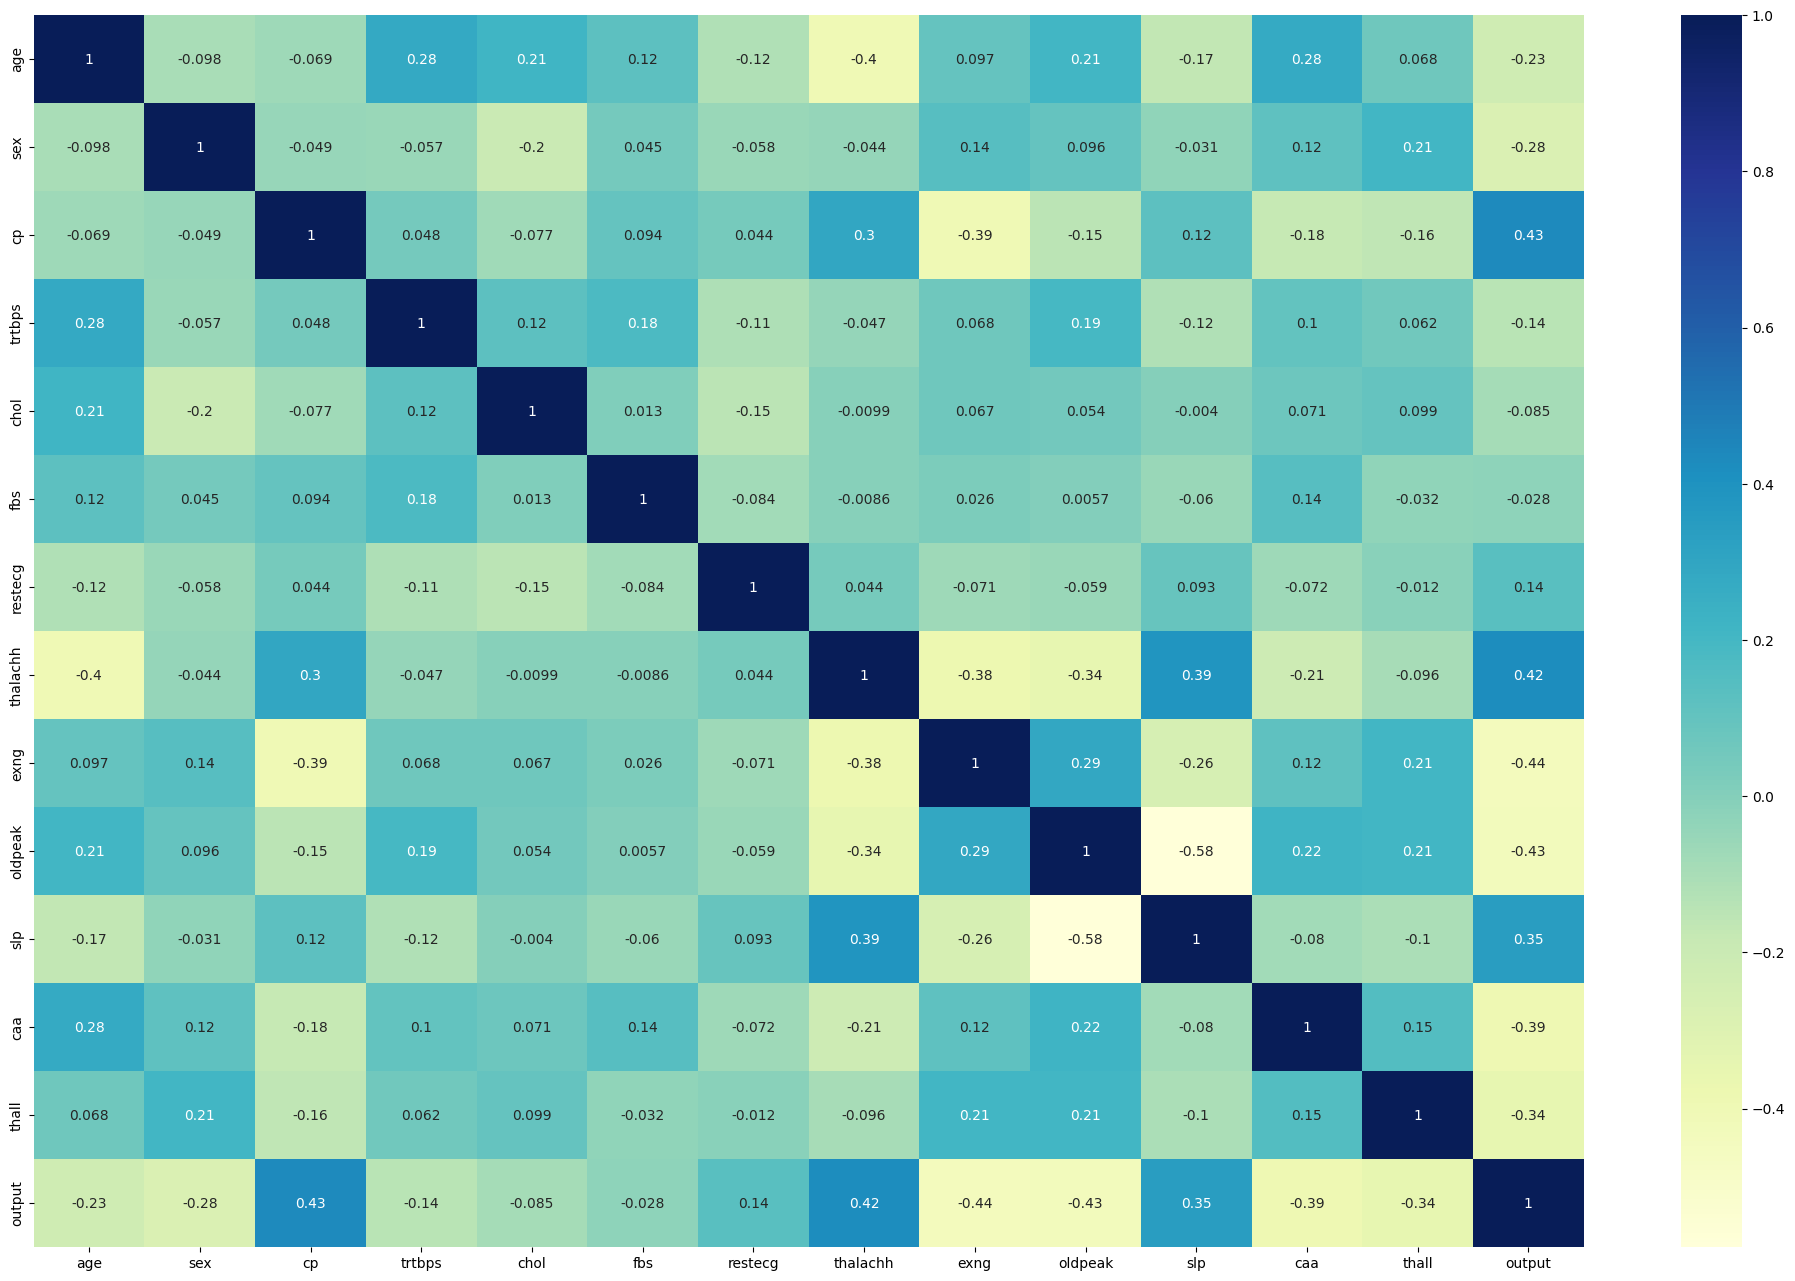

In [20]:
import seaborn as sns
correlation_matrix = heart_data.corr()
plt.figure(figsize=(25,16))
dataplot=sns.heatmap(correlation_matrix,cmap="YlGnBu",annot=True)

plt.show()
#almost everything is not directly realted to each other so we will use allthe parameters

In [21]:
heart_data.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(heart_data.iloc[:,0:-1],heart_data.iloc[:,-1],random_state=42,test_size=0.2)

In [23]:
x_train.shape

(242, 13)

In [24]:

y_train.shape

(242,)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
def model_evaluation(classifier):
    model=classifier
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    
    print(accuracy)
    print(classification_report(y_test,y_pred))
    return model


In [50]:
from sklearn.svm import SVC
SVC=SVC()
model_evaluation(SVC)

0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



SVC()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_criteria={'n_estimators':[25,50,100,200],
                'max_depth':[1,2,3,4,5],
                'criterion':['gini','entropy']}

In [54]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
rfc=RandomForestClassifier()
model_evaluation(rfc)

0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



RandomForestClassifier()

In [55]:
gcv=GridSearchCV(rfc,param_criteria,cv=10)

In [56]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 200]})

In [57]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [58]:
gcv.best_score_

0.843

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_evaluation(dtc)

0.8360655737704918
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



DecisionTreeClassifier()

In [60]:
param_criteria2={'criterion':['gini','entropy'],
'max_depth':[1,2,3,4,5,6,7,8,9,None]}
gdt=GridSearchCV(dtc,param_criteria2,cv=10)
gdt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [61]:
gdt.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [62]:
gdt.best_score_

0.8016666666666667

In [63]:
gdt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [65]:
model=model_evaluation(KNeighborsClassifier())

0.9016393442622951
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [66]:
model_logistic=model_evaluation(LogisticRegression())

0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [77]:
model_path=os.getenv("MODEL_PATH")+"/model.pkl"
print(model_path)
import pickle
with open(model_path,'wb') as f:
    pickle.dump(model,f)

/Users/rahulkumarair/Documents/rahul_vsCode/machine_learning/heart_attack/model.pkl
